## Download Base de Dados

In [1]:
!wget http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar

--2020-09-05 13:33:30--  http://groups.csail.mit.edu/vision/LabelMe/NewImages/indoorCVPR_09.tar
Resolving groups.csail.mit.edu (groups.csail.mit.edu)... 128.30.2.44
Connecting to groups.csail.mit.edu (groups.csail.mit.edu)|128.30.2.44|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2592010240 (2.4G) [application/x-tar]
Saving to: ‘indoorCVPR_09.tar’

indoorCVPR_09.tar   100%[===================>]   2.41G  21.4MB/s    in 2m 30s  

2020-09-05 13:36:00 (16.5 MB/s) - ‘indoorCVPR_09.tar’ saved [2592010240/2592010240]



In [2]:
!tar -xvf indoorCVPR_09.tar

A saída de streaming foi truncada nas últimas 5000 linhas.
Images/mall/CP67791.jpg
Images/mall/crocker_galleria_735089.jpg
Images/mall/mall1.jpg
Images/mall/d8.jpg
Images/mall/deira_city_centre_dubai_08.jpg
Images/mall/dungarv_new_mall.jpg
Images/mall/latham_circle_mall_16.jpg
Images/mall/eastridg1.jpg
Images/mall/IMG_6449.jpg
Images/mall/main_boutique_b.jpg
Images/mall/easyfranchise_centre_commercial_1.jpg
Images/mall/ins42.jpg
Images/mall/mall14.jpg
Images/mall/eaton_centre_2001_03.jpg
Images/mall/ins43.jpg
Images/mall/mall17.jpg
Images/mall/full_shopping_Central_1.jpg
Images/mall/galleria.jpg
Images/mall/galleria1.jpg
Images/mall/galleria2.jpg
Images/mall/Galleria_003.jpg
Images/mall/laurel_mall_06.jpg
Images/mall/Galleria_1.jpg
Images/mall/galleria_san_federico_nr_109_2_n1.jpg
Images/mall/ins23.jpg
Images/mall/ins44.jpg
Images/mall/mall18.jpg
Images/mall/galleria_vittorio_emanuele_ii_milan_mlgalar.jpg
Images/mall/ins45.jpg
Images/mall/mall19.jpg
Images/mall/GUM_Department_Store.jpg

In [4]:
import os
# Conta a quantidade de images por diretório
num_files_per_folder = [len(files) for root, dirs, files in os.walk('Images') if len(files) > 0]
folders = [dirs for root, dirs, files in os.walk('Images') if len(dirs) > 0][0]

In [9]:
num_files_per_folder, folders

([180,
  213,
  384,
  135,
  108,
  604,
  539,
  125,
  249,
  274,
  107,
  110,
  457,
  103,
  157,
  106,
  239,
  347,
  506,
  120,
  515,
  101,
  140,
  107,
  608,
  127,
  269,
  706,
  174,
  405,
  213,
  112,
  109,
  734,
  258,
  116,
  513,
  127,
  155,
  176,
  111,
  101,
  103,
  103,
  131,
  176,
  175,
  380,
  116,
  276,
  166,
  101,
  153,
  151,
  346,
  135,
  197,
  103,
  233,
  113,
  144,
  168,
  662,
  101,
  102,
  231,
  114],
 ['church_inside',
  'grocerystore',
  'pantry',
  'closet',
  'studiomusic',
  'bar',
  'subway',
  'laboratorywet',
  'locker_room',
  'dining_room',
  'restaurant_kitchen',
  'videostore',
  'inside_subway',
  'concert_hall',
  'jewelleryshop',
  'clothingstore',
  'hairsalon',
  'toystore',
  'warehouse',
  'cloister',
  'casino',
  'greenhouse',
  'artstudio',
  'library',
  'airport_inside',
  'gameroom',
  'winecellar',
  'livingroom',
  'poolinside',
  'bakery',
  'bowling',
  'children_room',
  'office',
  'kitchen'

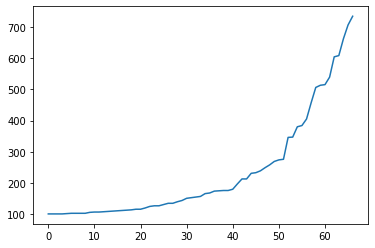

In [11]:
# Quantidade de imagens por pasta
import matplotlib.pyplot as plt
plt.plot(sorted(num_files_per_folder))

In [12]:
# Filtro das pastas com arquivos entre 300 e 600
import numpy as np 
filtro = [a & b for a, b in zip(np.array(num_files_per_folder) > 300,  np.array(num_files_per_folder) < 600)]

In [13]:
print(sum(filtro)) # Confirma a quantidade de categorias

10


In [14]:
pasta_salva = list(np.array(folders)[filtro])

In [15]:
pasta_salva

['pantry',
 'subway',
 'inside_subway',
 'toystore',
 'warehouse',
 'casino',
 'bakery',
 'restaurant',
 'bookstore',
 'corridor']

In [ ]:
# Apagando todas as pastas que não está na seleção acima
import shutil
[shutil.rmtree('Images/'+folder) for folder in folders if folder not in pasta_salva]

In [17]:
# Atualizando a quantiadades
num_files_per_folder = [len(files) for root, dirs, files in os.walk('Images') if len(files) > 0]
folders = [dirs for root, dirs, files in os.walk('Images') if len(dirs) > 0][0]

In [18]:
filenames = [os.listdir('Images/'+folder) for folder in folders]

In [ ]:
filenames

In [ ]:
num_files_per_folder[0], folders[0], filenames[0]

In [ ]:
np.random.seed(123) # Travando número aleatório
# Escolhendo as imagens para teste
files_to_test = [sorted(np.random.choice(files, round(num_files * 0.2), replace=False))
                                  for files, num_files in zip(filenames, num_files_per_folder)
]

# Separando em pastas as imagens de teste e treino
os.mkdir('Images/test/')
[os.mkdir('Images/test/'+folder) for folder in folders]
[shutil.move('Images/'+folder+'/'+file, 'Images/test/'+folder+'/'+file) for files, folder in zip(files_to_test, folders) for file in files]

In [30]:
os.mkdir('Images/train/')

In [31]:
[shutil.move('Images/'+folder, 'Images/train/'+folder) for folder in folders]

['Images/train/pantry',
 'Images/train/subway',
 'Images/train/inside_subway',
 'Images/train/toystore',
 'Images/train/warehouse',
 'Images/train/casino',
 'Images/train/bakery',
 'Images/train/restaurant',
 'Images/train/bookstore',
 'Images/train/corridor']

# Visualizando as Imagens

In [35]:
!mv Images dataset

In [36]:
filenames = [os.listdir('dataset/train/'+folder) for folder in folders]

files_to_visualize = [sorted(np.random.choice(files, 4)) for files in filenames]

files_to_visualize

[['pantry_150_03_flickr.jpg',
  'pantry_18_09_flickr.jpg',
  'pantry_31_15_flickr.jpg',
  'pantry_60_05_flickr.jpg'],
 ['subway_0090.jpg', 'subway_0157.jpg', 'subway_0378.jpg', 'subway_0413.jpg'],
 ['inside_subway_0006.jpg',
  'inside_subway_0169.jpg',
  'inside_subway_0277.jpg',
  'inside_subway_0394.jpg'],
 ['305015506_6df5016b5c.jpg',
  'Spielzeug_41_18_yahoo.jpg',
  'Spielzeug_84_23_flickr.jpg',
  'jugueteria_15_10_flickr.jpg'],
 ['warehouse_0011.jpg',
  'warehouse_0141.jpg',
  'warehouse_0147.jpg',
  'warehouse_0466.jpg'],
 ['casino_0270.jpg', 'casino_0284.jpg', 'casino_0308.jpg', 'casino_0351.jpg'],
 ['boulangerie_51_20_altavista.jpg',
  'panaderia_21_08_yahoo.jpg',
  'panaderia_36_04_yahoo.jpg',
  'panaderia_40_18_yahoo.jpg'],
 ['restau_17.jpg',
  'restaurant_07_08_altavista.jpg',
  'restaurant_39_06_altavista.jpg',
  'restaurante_04_17_altavista.jpg'],
 ['Librairie_22_16_altavista.jpg',
  'Libreria_17_11_altavista.jpg',
  'index_librairie.jpg',
  'photo_magasin.jpg'],
 ['Main_C

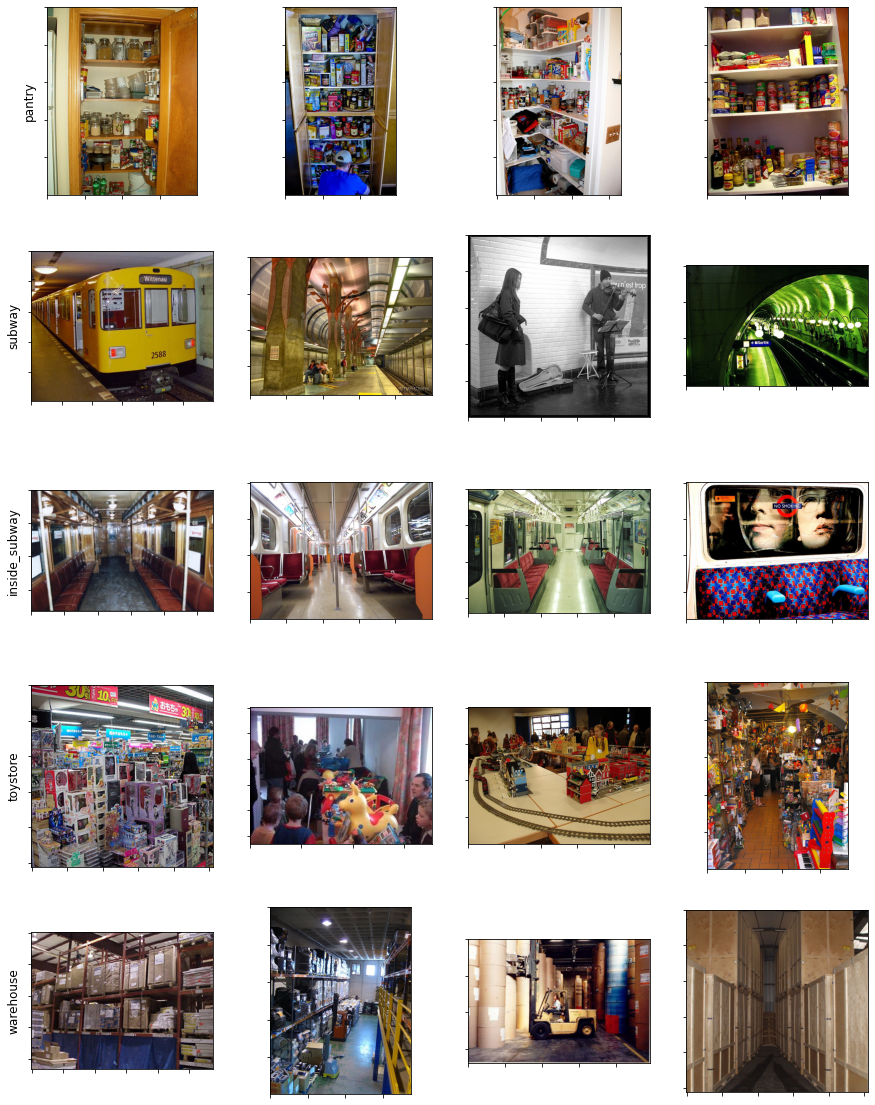

In [37]:
fig, ax = plt.subplots(5, 4, figsize=(15,20))

for row in range(5):
  category = folders[row]
  ax_row = ax[row]
  for column in range(4):
    img = plt.imread('dataset/train/'+category+'/'+files_to_visualize[row][column])
    ax_column = ax_row[column]
    ax_column.imshow(img)
    if column == 0:
      ax_column.set_ylabel(category, size='large')
    ax_column.set_xticklabels([])
    ax_column.set_yticklabels([])

# Preparando os datasets no formato para o Pytorch

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torchvision import datasets, models
import torchvision.transforms as transforms 
from datetime import datetime

In [39]:
data_dir_train = 'dataset/train'
data_dir_test = 'dataset/test'

# Deixar a imagem do mesmo tamanho que a rede foi Pré-Treinada 
transform = transforms.Compose([transforms.Resize([224, 224]), transforms.ToTensor()])

train_dataset = datasets.ImageFolder(data_dir_train, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True) # 32 Por que tem pouca imagem

test_dataset = datasets.ImageFolder(data_dir_test, transform=transform)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True) # 32 Por que tem pouca imagem

# Modelo

In [40]:
model = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


In [41]:
model.parameters

<bound method Module.parameters of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size

In [42]:
# Adaptando a rede para nosso problema 
n_inputs = model.classifier[6].in_features

classification_layer = nn.Linear(n_inputs, len(train_dataset.classes))

model.classifier[6] = classification_layer

n_inputs, len(train_dataset.classes)

(4096, 10)

In [43]:
for param in model.features.parameters():
  param.requires_grad = False # Congela as camadas de convolução para não alterar os pesos

In [44]:
criterion = nn.CrossEntropyLoss() # Critério de avaliação
optimizer = optim.Adam(model.parameters())

# Treinamento e validação

In [45]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [46]:
device

device(type='cuda')

In [54]:
# Função para treinar a rede
def training_loop(loader, epoch):
  running_loss = 0.
  running_accuracy = 0.

  for i, data in enumerate(loader): # Batch Size
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad() # Zera o gradiente

    outputs = model(inputs) # Previsão dos valores

    loss = criterion(outputs, labels) 
    loss.backward() # Repassa o loss para os neurônios

    optimizer.step() # Atualiza os paramêtros

    running_loss += loss.item()

    predicted = torch.argmax(F.softmax(outputs, dim=1), dim=1) # Retorna a classe com maior probabilidade

    equals = predicted == labels # Verifica se valor predito é igual ao real 

    accuracy = torch.mean(equals.float())

    running_accuracy += accuracy

  print('\rÉpoca {:3d} Finalizada: perda {:.5f} - acurácia {:.5f}'.format(epoch+1, 
                                                            running_loss/len(loader),
                                                            running_accuracy/len(loader)))

In [68]:
start = datetime.now()
for epoch in range(5):
  print('Treinando....')
  training_loop(train_loader, epoch)
  model.eval()
  print('Validando....')
  training_loop(test_loader, epoch)
  model.train()
end = datetime.now()
print(f'\nMinutos de execução: {end.minute - start.minute}')

Treinando....
Época   1 Finalizada: perda 0.70048 - acurácia 0.95549
Validando....
Época   1 Finalizada: perda 0.08966 - acurácia 0.98438
Treinando....
Época   2 Finalizada: perda 0.67959 - acurácia 0.95732
Validando....
Época   2 Finalizada: perda 0.20087 - acurácia 0.97768
Treinando....
Época   3 Finalizada: perda 0.84749 - acurácia 0.95732
Validando....
Época   3 Finalizada: perda 0.18585 - acurácia 0.98438
Treinando....
Época   4 Finalizada: perda 0.40113 - acurácia 0.97585
Validando....
Época   4 Finalizada: perda 0.35888 - acurácia 0.98214
Treinando....
Época   5 Finalizada: perda 0.76032 - acurácia 0.96726
Validando....
Época   5 Finalizada: perda 0.25339 - acurácia 0.98549
Minutos de execução: 5


In [74]:
# Validando o modelo
images, labels = next(iter(test_loader))

model.eval() # Indica que vamos testar o modelo

predicted = model(images.to(device)).cpu() 

predicted = torch.argmax(F.softmax(predicted, dim=1), dim=1)

predicted

tensor([0, 5, 6, 9, 2, 3, 8, 9, 9, 0, 5, 4, 6, 6, 3, 4, 6, 4, 7, 5, 2, 4, 4, 1,
        7, 6, 6, 2, 2, 9, 0, 4])

In [75]:
test_dataset.class_to_idx

{'bakery': 0,
 'bookstore': 1,
 'casino': 2,
 'corridor': 3,
 'inside_subway': 4,
 'pantry': 5,
 'restaurant': 6,
 'subway': 7,
 'toystore': 8,
 'warehouse': 9}

In [76]:
idx_to_class = {k:v for v, k in test_dataset.class_to_idx.items()} # Reorganizando nossos índice
idx_to_class

{0: 'bakery',
 1: 'bookstore',
 2: 'casino',
 3: 'corridor',
 4: 'inside_subway',
 5: 'pantry',
 6: 'restaurant',
 7: 'subway',
 8: 'toystore',
 9: 'warehouse'}

In [77]:
# Transformação da saida torch em numpy
labels, predicted = labels.detach().numpy(), predicted.detach().numpy() #
labels, predicted

(array([0, 5, 6, 9, 2, 3, 8, 9, 9, 0, 5, 4, 6, 6, 3, 4, 6, 4, 7, 5, 2, 4,
        4, 1, 7, 6, 6, 2, 2, 9, 0, 4]),
 array([0, 5, 6, 9, 2, 3, 8, 9, 9, 0, 5, 4, 6, 6, 3, 4, 6, 4, 7, 5, 2, 4,
        4, 1, 7, 6, 6, 2, 2, 9, 0, 4]))

In [78]:
labels = [idx_to_class[label] for label in labels]
predicted = [idx_to_class[label] for label in predicted]

In [79]:
labels, predicted

(['bakery',
  'pantry',
  'restaurant',
  'warehouse',
  'casino',
  'corridor',
  'toystore',
  'warehouse',
  'warehouse',
  'bakery',
  'pantry',
  'inside_subway',
  'restaurant',
  'restaurant',
  'corridor',
  'inside_subway',
  'restaurant',
  'inside_subway',
  'subway',
  'pantry',
  'casino',
  'inside_subway',
  'inside_subway',
  'bookstore',
  'subway',
  'restaurant',
  'restaurant',
  'casino',
  'casino',
  'warehouse',
  'bakery',
  'inside_subway'],
 ['bakery',
  'pantry',
  'restaurant',
  'warehouse',
  'casino',
  'corridor',
  'toystore',
  'warehouse',
  'warehouse',
  'bakery',
  'pantry',
  'inside_subway',
  'restaurant',
  'restaurant',
  'corridor',
  'inside_subway',
  'restaurant',
  'inside_subway',
  'subway',
  'pantry',
  'casino',
  'inside_subway',
  'inside_subway',
  'bookstore',
  'subway',
  'restaurant',
  'restaurant',
  'casino',
  'casino',
  'warehouse',
  'bakery',
  'inside_subway'])

In [80]:
# Batch 0
# dimensao 2 e 3
# rgb 1
images = images.permute(0, 2, 3, 1).numpy()

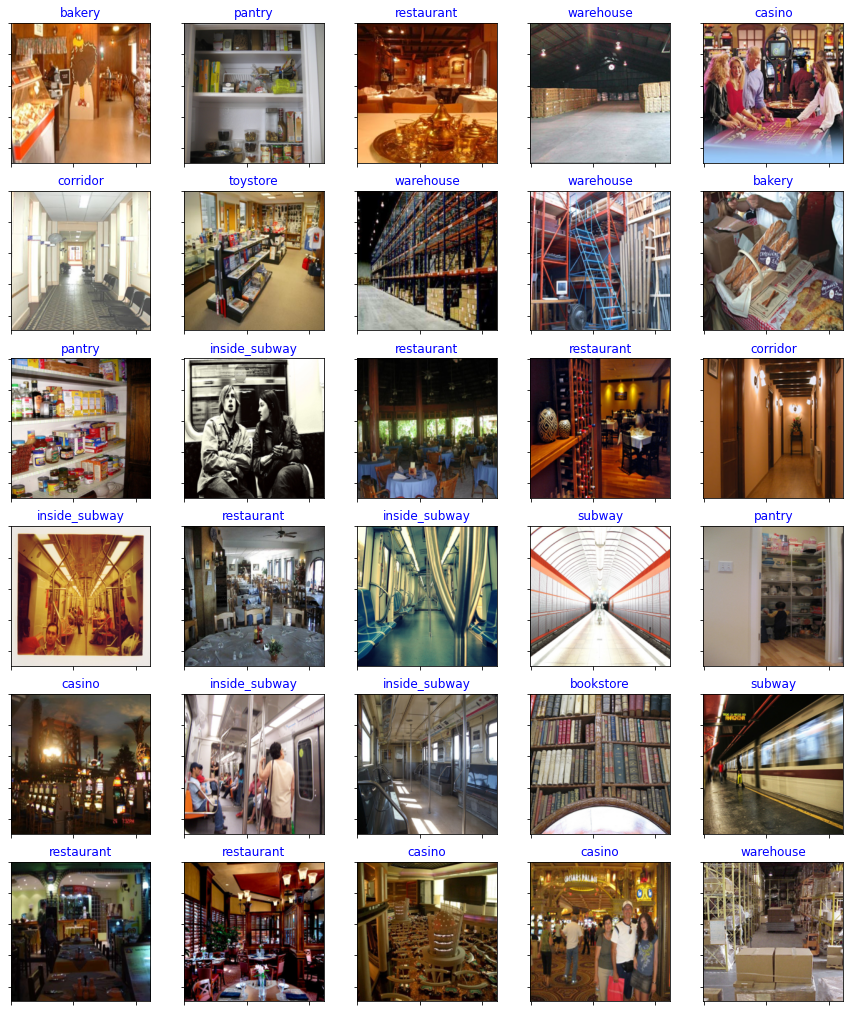

In [81]:
# Caso nosso modelo acerte o titulo da imagem fica azul
fig, ax = plt.subplots(6, 5, figsize=(15,18))
i=0
for row in range(6):
  ax_row = ax[row]
  for column in range(5):
    ax_column = ax_row[column]
    ax_column.imshow(images[i])
    ax_column.set_xticklabels([])
    ax_column.set_yticklabels([])
    col = 'blue' if labels[i] == predicted[i] else 'red'
    ax_column.set_title(predicted[i], color=col)
    i += 1